# BIDV (7:3)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/BIDV.csv',sep=",")

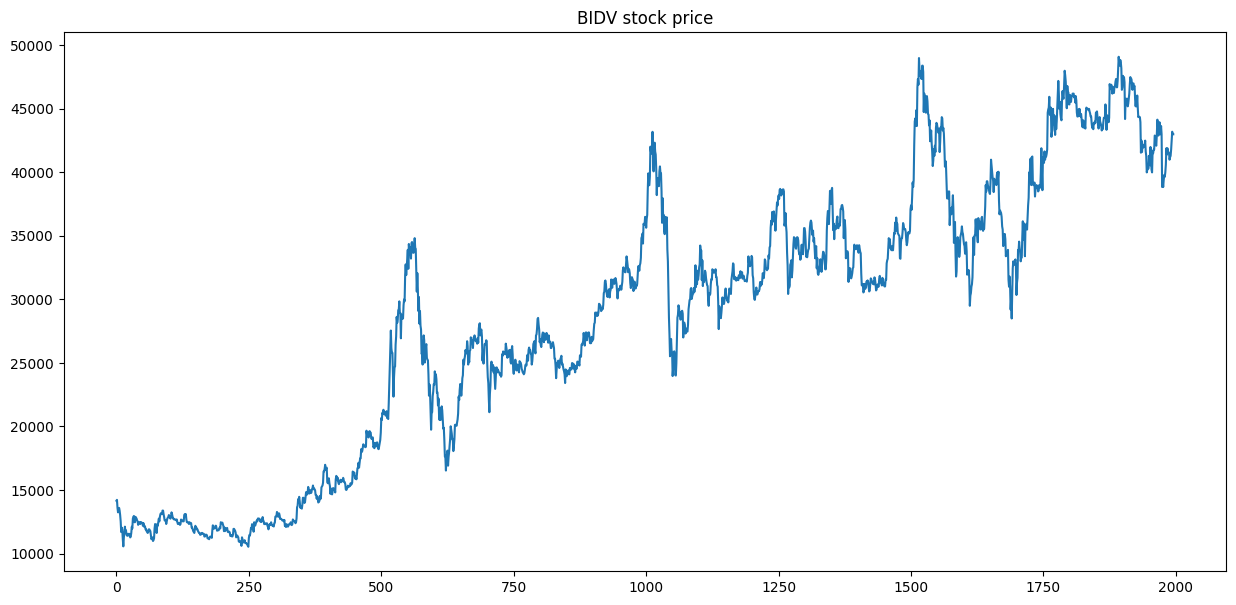

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.7 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 15.1 MB/s eta 0:00:00


In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 7849.683321666032
Testing MAPE: 15.287205172900192
Testing MSLE: 0.040718863013100536


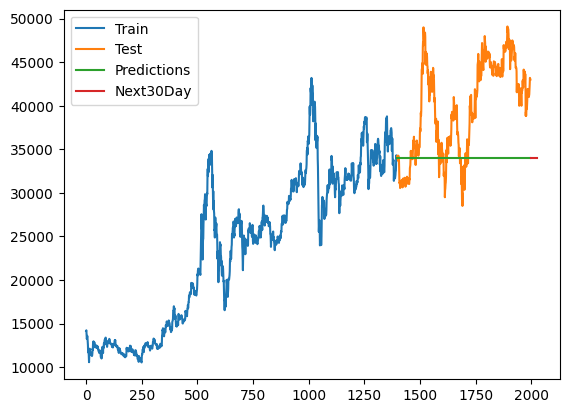

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# BIDV (8:2)



In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/BIDV.csv',sep=",")

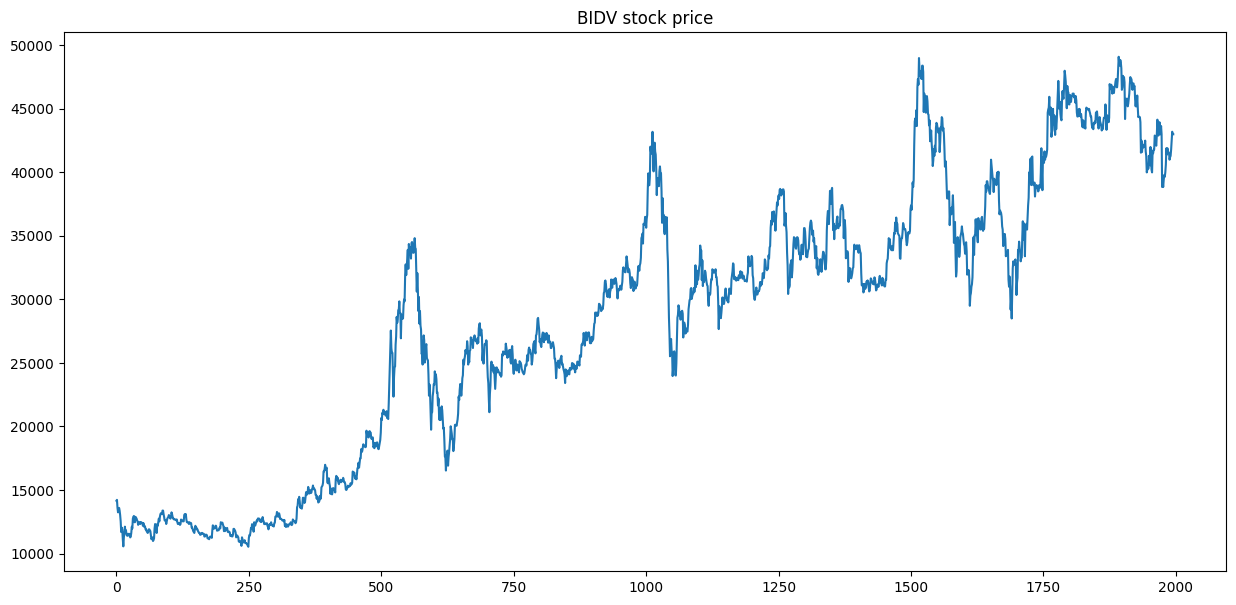

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.8 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 7502.4992376934615
Testing MAPE: 15.148336697731995
Testing MSLE: 0.035744621711870275


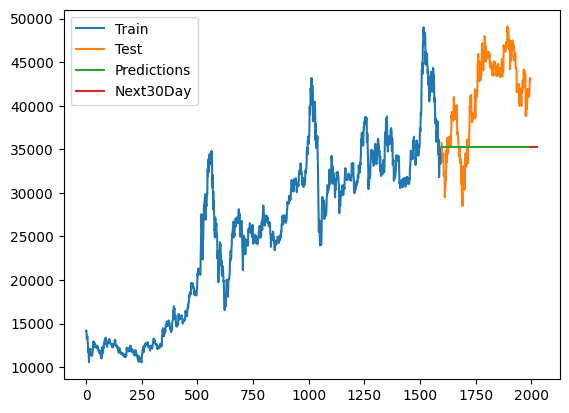

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# BIDV (9:1)

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
#2. Read data
data = pd.read_csv('/content/BIDV.csv',sep=",")

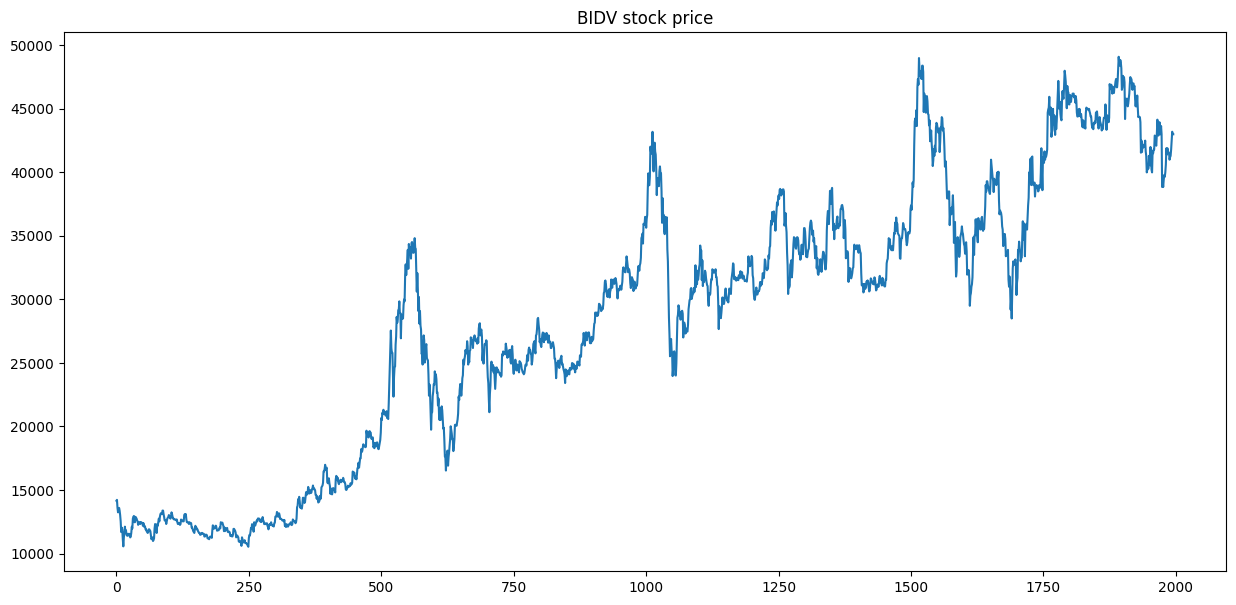

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(data['Price'])
plt.title('BIDV stock price')
plt.show()

In [ ]:
data

,Date,Price,Open,High,Low,Vol.,Change %
0,01/05/2016,14155,14225,14366,14085,1.39M,0
1,01/06/2016,14225,14085,14296,14085,1.13M,0
2,01/07/2016,13592,14155,14225,13380,3.25M,0
3,01/08/2016,13240,13592,13592,12887,1.53M,0
4,01/11/2016,13380,13380,13592,13310,1.14M,0
...,...,...,...,...,...,...,...
1991,12/21/2023,41800,40900,41900,40900,1.14M,0
1992,12/22/2023,42450,41800,42450,41400,1.19M,0
1993,12/25/2023,43200,42500,43300,42000,1.17M,0
1994,12/26/2023,43000,43200,43550,42700,1.16M,0


In [ ]:
# Split the data into training, testing sets

train_size = int(0.9 * len(data))
test_size = len(data) - train_size

train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

In [ ]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
pip install sktime

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [ ]:
simple_exp = ExponentialSmoothing(trend=None, seasonal=None)

In [ ]:
#5. Fit model with train data
simple_exp.fit(y_train)

ExponentialSmoothing()

In [ ]:
# 6. Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])


In [ ]:
y_pred = simple_exp.predict(test_data.index)

In [ ]:
#8. Predict next 30 days
last_index = data.index[-1]
fh = list(range(last_index + 1, last_index + 31))
y_next_30_days = simple_exp.predict(fh)

In [ ]:
# 9. Evaluating algorithm accuracy using
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
from sklearn.metrics import mean_absolute_percentage_error
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape*100)

# MSLE
from sklearn.metrics import mean_squared_log_error
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)


Testing RMSE: 3342.810230554252
Testing MAPE: 6.356191550176706
Testing MSLE: 0.005719166692661255


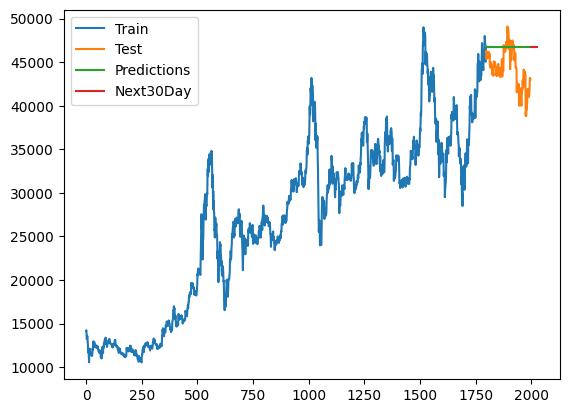

In [ ]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(range(last_index+1, last_index+31),y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()